Dependencies

In [75]:
pip install mne, numpy, pandas,mne-qt-browser

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'mne,'


In [1]:
import mne
import numpy as np
import pandas as pd 
from mne.viz import set_browser_backend
set_browser_backend("qt")

Loading bdf file and excluding bad non-eeg channels (Accelerometer channels )

In [2]:
raw = mne.io.read_raw_bdf("exp cosmin.bdf")
raw.info["bads"].extend(['Accel X','Accel Y', 'Accel Z'])
print(raw.info)

Extracting EDF parameters from c:\Users\eduardmarin\OneDrive - Nagarro\Desktop\EEG Data Analysis\exp cosmin.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
<Info | 9 non-empty values
 bads: 3 items (Accel X, Accel Y, Accel Z)
 ch_names: EEG 1, EEG 2, EEG 3, EEG 4, EEG 5, EEG 6, EEG 7, EEG 8, Accel X, ...
 chs: 11 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2024-02-13 22:38:11 UTC
 nchan: 11
 projs: []
 sfreq: 250.0 Hz
 subject_info: 3 items (dict)
>


Reading annotations for experiment stages -> reading from phone,reading from book,baseline

In [3]:
annot_from_exp= mne.read_annotations("saved-annotations.csv")
raw.set_annotations(annot_from_exp)

Measurement date,"February 13, 2024 22:38:11 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,8 EEG
Bad channels,"Accel X, Accel Y, Accel Z"
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.00 Hz
Lowpass,125.00 Hz


In [71]:
raw.plot()

Preprocessing 
    -> eliminating power supply frequency( 50Hz frequency and its harmonics for Romania)
References: 
 *  https://neuraldatascience.io/7-eeg/erp_filtering.html
 *  https://neuraldatascience.io/7-eeg/erp_artifacts.html

Reading 0 ... 366499  =      0.000 ...  1465.996 secs...
Effective window size : 8.192 (s)


C:\Users\eduardmarin\AppData\Local\Temp\ipykernel_20772\1925268983.py:4: UserWarning: Infinite value in PSD for channels Accel X, Accel Y, Accel Z.
These channels might be dead.
  raw.compute_psd().plot()
C:\Users\eduardmarin\AppData\Local\Temp\ipykernel_20772\1925268983.py:4: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd().plot()
c:\Users\eduardmarin\AppData\Local\anaconda3\Lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


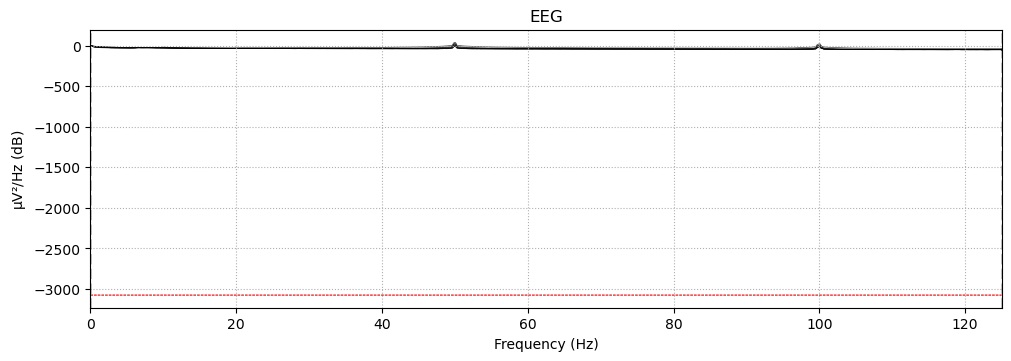

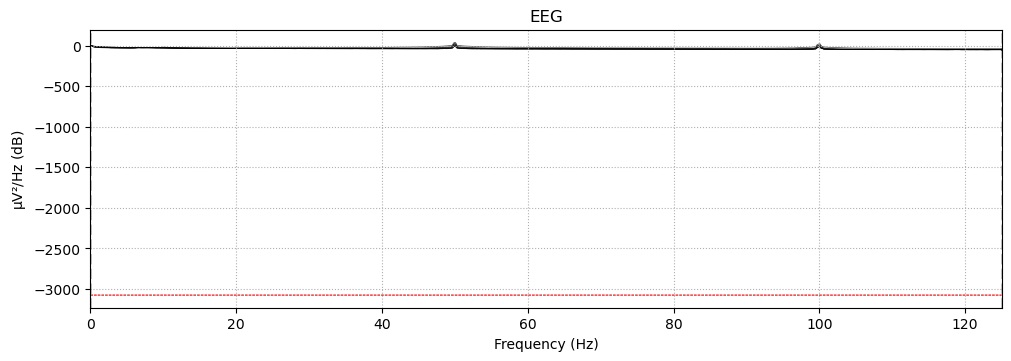

In [5]:
#before filtering
raw = raw.load_data().crop(tmin=21,tmax=1440)
raw_copy = raw.copy()
raw.compute_psd().plot()

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 70 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 70.00 Hz
- Upper transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 78.75 Hz)
- Filter length: 2751 samples (11.004 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Effective window size : 8.192 (s)


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished
C:\Users\eduardmarin\AppData\Local\Temp\ipykernel_20772\3409090161.py:11: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_filt.compute_psd().plot()
c:\Users\eduardmarin\AppData\Local\anaconda3\Lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


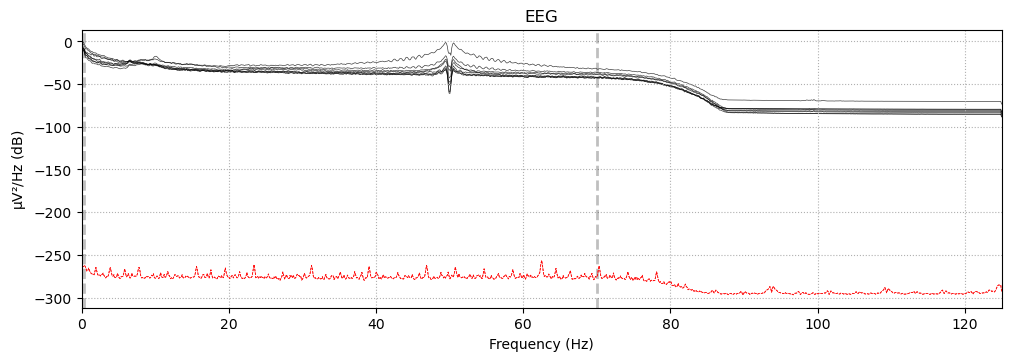

In [6]:

freqs = (50, 100)


# Filter settings
low_cut = 0.3 #filtering as high as 1/10 of minimum frequency of interest
high_cut  = 70 


raw_filt = raw.copy().notch_filter(freqs=freqs).filter(low_cut, high_cut)
#after filtering
raw_filt.compute_psd().plot()


In [7]:
raw_filt.plot()

Eliminating ocular and muscle artefacts with ICA

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)



Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 70 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 70.00 Hz
- Upper transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 78.75 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Effective window size : 8.192 (s)


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished
C:\Users\eduardmarin\AppData\Local\Temp\ipykernel_20772\4102981639.py:14: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_ica_filt.compute_psd().plot()
c:\Users\eduardmarin\AppData\Local\anaconda3\Lib\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


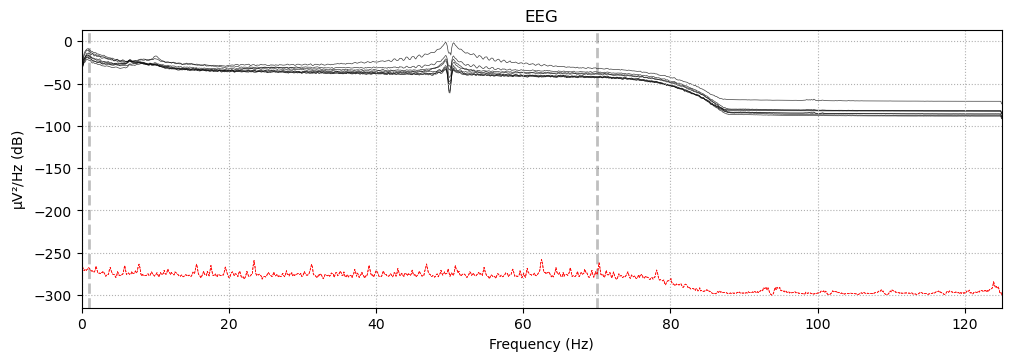

In [8]:
#filtering frequencies as high as 1Hz, because these explain the most variance and are not related with neural signals

raw_ica = raw_copy
freqs = (50, 100)


# Filter settings
low_cut = 1 
high_cut  = 70 


raw_ica_filt = raw_ica.copy().notch_filter(freqs=freqs).filter(low_cut, high_cut)

raw_ica_filt.compute_psd().plot()



In [9]:
# ICA parameters
random_state = 42   # ensures ICA is reproducible each time it's run
ica_n_components = 8    

# Fit ICA
ica = mne.preprocessing.ICA(n_components=ica_n_components,
                            random_state=random_state,
                            )
ica.fit(raw_ica_filt)

Fitting ICA to data using 8 channels (please be patient, this may take a while)
Selecting by number: 8 components
Fitting ICA took 2.0s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,34 iterations on raw data (354751 samples)
ICA components,8
Available PCA components,8
Channel types,eeg
ICA components marked for exclusion,—


In [72]:
ica.plot_sources(raw_ica_filt)

Creating RawArray with float64 data, n_channels=8, n_times=354751
    Range : 5250 ... 360000 =     21.000 ...  1440.000 secs
Ready.


Channels marked as bad:
['Accel X', 'Accel Y', 'Accel Z']


excluding 0 and 1 components, as they seem to resemble muscular and ocular artefacts, and also explain the most variance (higher amplitude most likely to be noise)

In [11]:
ica.get_explained_variance_ratio(raw,components =[0])
ica.apply(raw_filt,exclude=[0,1])

Applying ICA to Raw instance
    Transforming to ICA space (8 components)
    Zeroing out 2 ICA components
    Projecting back using 8 PCA components


Measurement date,"February 13, 2024 22:38:11 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,8 EEG
Bad channels,"Accel X, Accel Y, Accel Z"
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,0.30 Hz
Lowpass,70.00 Hz


In [73]:
raw_filt.plot()

Comparison at group level (all electrodes)

Analyzing reading from phone data

In [13]:
ACTIVITY_ANNOTATIONS= set(['Citit Hartie', 'Citit Telefon', 'Relaxare'])
activity_intervals = {}

for annotation in raw_filt.annotations.__iter__():
    if annotation['description'] in ACTIVITY_ANNOTATIONS:
        if annotation['description'] not in activity_intervals.keys():
            activity_intervals[annotation['description']]=[]
        activity_intervals[annotation['description']].append((annotation['onset'],annotation['onset'] + annotation['duration']))
print(activity_intervals)

{'Relaxare': [(21.0, 65.382368), (720.012541, 779.0829689475981)], 'Citit Hartie': [(65.389507, 720.0000003774035)], 'Citit Telefon': [(779.121894, 1440.0000002590978)]}


In [36]:
beta_freq_interval = (4,8)
theta_freq_interval = (13,30)
phone_exp_interval = activity_intervals['Citit Telefon'][0] 
raw_phone = raw_filt.copy().crop(tmin=phone_exp_interval[0]) #we don't specify tmax because phone reading is last exp and annotations haven't updated after cropping (MNE bug)



beta_band_power = raw_phone.copy().compute_psd(fmin=beta_freq_interval[0],fmax = beta_freq_interval[1]).to_data_frame()['freq'].sum()
theta_band_power = raw_phone.copy().compute_psd(fmin=theta_freq_interval[0],fmax = theta_freq_interval[1]).to_data_frame()['freq'].mean()

print(f'Reading from phone, beta_band_power:{beta_band_power},theta_band_power:{theta_band_power},ratio:{theta_band_power/beta_band_power}')

Effective window size : 8.192 (s)


Effective window size : 8.192 (s)
Reading from phone, beta_band_power:197.3876953125,theta_band_power:2986.328125,ratio:15.129251700680273


Analyzing reading from paper

In [61]:
beta_freq_interval = (4,8)
theta_freq_interval = (13,30)
book_exp_interval = activity_intervals['Citit Hartie'][0] 
raw_book = raw_filt.copy().crop(tmin=book_exp_interval[0],tmax=book_exp_interval[1]) 

raw_book.copy().compute_psd(fmin=beta_freq_interval[0],fmax = beta_freq_interval[1])

spectrum_df = raw_book.copy().compute_psd(fmin=beta_freq_interval[0],fmax = beta_freq_interval[1]).to_data_frame()
spectrum_df = spectrum_df.drop(['freq','Accel X', 'Accel Y', 'Accel Z'],axis=1)
print(spectrum_df)
beta_bandpower = spectrum_df.sum()

spectrum_df = raw_book.copy().compute_psd(fmin=theta_freq_interval[0],fmax = theta_freq_interval[1]).to_data_frame()
spectrum_df = spectrum_df.drop(['freq','Accel X', 'Accel Y', 'Accel Z'],axis=1)
theta_bandpower = spectrum_df.sum()
print(f'Reading from phone, beta_band_power:{beta_band_power},theta_band_power:{theta_band_power},ratio:{theta_band_power/beta_band_power}')

Effective window size : 8.192 (s)


Effective window size : 8.192 (s)
           EEG 1         EEG 2         EEG 3         EEG 4         EEG 5  \
0   1.820610e-15  1.362967e-15  8.159548e-16  4.334612e-16  1.293183e-15   
1   2.073601e-15  1.404417e-15  8.408263e-16  4.281145e-16  1.339462e-15   
2   1.716334e-15  1.179183e-15  7.569634e-16  4.658495e-16  1.304537e-15   
3   1.643760e-15  1.200077e-15  7.554080e-16  4.834934e-16  1.457440e-15   
4   1.943859e-15  1.357932e-15  8.542421e-16  4.093257e-16  1.450085e-15   
5   2.088302e-15  1.401005e-15  8.948709e-16  4.479680e-16  1.469318e-15   
6   2.090019e-15  1.565644e-15  9.107466e-16  5.028069e-16  1.461841e-15   
7   1.865936e-15  1.512533e-15  8.009538e-16  4.140466e-16  1.391718e-15   
8   1.531824e-15  1.125638e-15  6.738242e-16  3.793074e-16  1.207928e-15   
9   1.637790e-15  1.082633e-15  6.213892e-16  3.547664e-16  1.016140e-15   
10  1.490770e-15  1.068614e-15  5.778264e-16  4.795932e-16  1.468208e-15   
11  1.396899e-15  9.388719e-16  5.803784e-16  5.244738

Comparison for each electrode

In [69]:
result={}
electrode_theta_band_power=[]
for electrode in raw_filt.info['ch_names'][:-3]:

    spectrum_df = raw_book.copy().compute_psd(fmin=beta_freq_interval[0],fmax = beta_freq_interval[1]).to_data_frame()
    spectrum_df = spectrum_df.drop(['freq','Accel X', 'Accel Y', 'Accel Z'],axis=1)
  
    book_beta_bandpower = spectrum_df[electrode].sum()

    spectrum_df = raw_book.copy().compute_psd(fmin=theta_freq_interval[0],fmax = theta_freq_interval[1]).to_data_frame()
    spectrum_df = spectrum_df.drop(['freq','Accel X', 'Accel Y', 'Accel Z'],axis=1)
    book_theta_bandpower = spectrum_df[electrode].sum()
    
    result[electrode]={
        'book':{ 
            'beta':book_beta_band_power,
            'theta':book_theta_band_power,
            'ratio':book_theta_band_power/book_beta_band_power},
              'phone':{
            'beta':phone_beta_band_power,
            'theta':phone_theta_band_power,
            'ratio':phone_theta_band_power/phone_beta_band_power
        }
            },
          

Effective window size : 8.192 (s)


Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)
Effective window size : 8.192 (s)


In [70]:
print(result)

{'EEG 1': ({'book': {'beta': 197.3876953125, 'theta': 2986.328125, 'ratio': 15.129251700680273}, 'phone': {'beta': 197.3876953125, 'theta': 2986.328125, 'ratio': 15.129251700680273}},), 'EEG 2': ({'book': {'beta': 197.3876953125, 'theta': 2986.328125, 'ratio': 15.129251700680273}, 'phone': {'beta': 197.3876953125, 'theta': 2986.328125, 'ratio': 15.129251700680273}},), 'EEG 3': ({'book': {'beta': 197.3876953125, 'theta': 2986.328125, 'ratio': 15.129251700680273}, 'phone': {'beta': 197.3876953125, 'theta': 2986.328125, 'ratio': 15.129251700680273}},), 'EEG 4': ({'book': {'beta': 197.3876953125, 'theta': 2986.328125, 'ratio': 15.129251700680273}, 'phone': {'beta': 197.3876953125, 'theta': 2986.328125, 'ratio': 15.129251700680273}},), 'EEG 5': ({'book': {'beta': 197.3876953125, 'theta': 2986.328125, 'ratio': 15.129251700680273}, 'phone': {'beta': 197.3876953125, 'theta': 2986.328125, 'ratio': 15.129251700680273}},), 'EEG 6': ({'book': {'beta': 197.3876953125, 'theta': 2986.328125, 'ratio':

It seems that there is no significat difference between reading from screen and paper, for this subject, or an implementation error has occured